# Welcome to Python Descriptive Statistics!

- In this hands-on session, we will learn the basics of statistics using Python.

- We will explore Mean, Median, and Mode with real-world data and bite-sized code.

## What are Descriptive Statistics?

Descriptive statistics help us summarize and understand data.

The most common measures are:
- **Mean** (Average)
- **Median** (Middle value)
- **Mode** (Most frequent value)

These metrics give us a quick idea of what is typical in our data.

In [2]:
# Data setup
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning

warnings.filterwarnings('ignore', category=ValueWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips')
print('Shape of the data:', tips.shape)
print('First 5 rows:')
print(tips.head())

Shape of the data: (244, 7)
First 5 rows:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### Our Example Data: What is in 'tips'?

'tips' is a classic dataset with restaurant bills and tips.

Columns include:
- 'total_bill': the meal price
- 'tip': the tip given
- 'sex': server gender
- 'smoker': whether the party smoked
- 'day': day of week
- 'time': lunch or dinner
- 'size': number of people

Let us explore: our main column today is 'total_bill'.

In [3]:
# Let us see basic numbers: mean, median, mode
import numpy as np
from scipy import stats

bills = tips['total_bill']
mean_bill = np.mean(bills)
median_bill = np.median(bills)
mode_bill = stats.mode(bills, keepdims=True)[0][0]

print('Mean: $%.2f' % mean_bill)
print('Median: $%.2f' % median_bill)
print('Mode: $%.2f' % mode_bill)

Mean: $19.79
Median: $17.80
Mode: $13.42


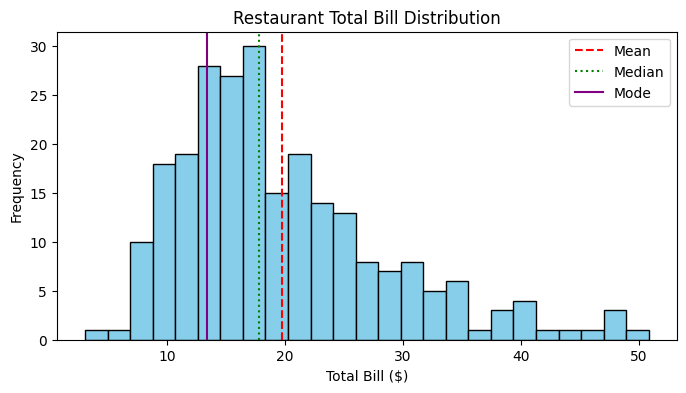

In [4]:
# Visualize the distribution of total_bill
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(bills, bins=25, color='skyblue', edgecolor='black')
plt.axvline(mean_bill, color='red', label='Mean', linestyle='--')
plt.axvline(median_bill, color='green', label='Median', linestyle=':')
plt.axvline(mode_bill, color='purple', label='Mode', linestyle='-')
plt.xlabel('Total Bill ($)')
plt.ylabel('Frequency')
plt.title('Restaurant Total Bill Distribution')
plt.legend()
plt.show()

In [5]:
# Experiencing skew: Let us add an outlier
bills_with_outlier = bills.copy()
bills_with_outlier = pd.concat([bills_with_outlier, pd.Series([399])], ignore_index=True)
mean_with_outlier = np.mean(bills_with_outlier)
median_with_outlier = np.median(bills_with_outlier)

print("Mean with outlier: $%.2f" % mean_with_outlier)
print("Median with outlier: $%.2f" % median_with_outlier)

Mean with outlier: $21.33
Median with outlier: $17.81


## Comparing the impact of outliers

Notice how the mean increases a lot with one giant bill.

The median hardly changes at all.

This is why median is safer when data contains outliers.

In [6]:
# Exploring mode and duplicates
print('All bill amounts with their counts:')
print(bills.value_counts().head(10))

most_common_bill_value = bills.value_counts().idxmax()
most_common_bill_count = bills.value_counts().max()
print('Most common bill: $%.2f (%d times)' % (most_common_bill_value, most_common_bill_count))

All bill amounts with their counts:
total_bill
13.42    3
21.01    2
20.69    2
10.33    2
10.34    2
20.29    2
10.07    2
13.81    2
18.29    2
15.98    2
Name: count, dtype: int64
Most common bill: $13.42 (3 times)


In [7]:
# Handling missing values in data
print("Number of missing total_bill values:", tips['total_bill'].isnull().sum())

# Remove rows with missing total_bill
clean_tips = tips[tips['total_bill'].notnull()]
print("Rows after cleaning:", len(clean_tips))

Number of missing total_bill values: 0
Rows after cleaning: 244


In [8]:
# Compute mean, median, and mode of the tip column
tip_amounts = clean_tips['tip']
mean_tip = tip_amounts.mean()
median_tip = tip_amounts.median()
mode_tip = tip_amounts.mode()[0]

print("Mean tip: $%.2f" % mean_tip)
print("Median tip: $%.2f" % median_tip)
print("Mode tip: $%.2f" % mode_tip)

Mean tip: $3.00
Median tip: $2.90
Mode tip: $2.00


# Extra: Grouped summaries

- Can we compare statistics by groups, like day or smoker?
- Yes! We can break down averages by group for deeper insights.

In [9]:
# Mean bill by day of week
mean_by_day = clean_tips.groupby('day', observed=False)['total_bill'].mean()
print('Average bill per day:')
print(mean_by_day)

Average bill per day:
day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64


In [10]:
# Median and mode by smoker group
median_by_smoker = clean_tips.groupby('smoker', observed=False)['total_bill'].median()
mode_by_smoker = clean_tips.groupby('smoker', observed=False)['total_bill'].agg(lambda x: x.mode()[0])

print('Median by smoker:')
print(median_by_smoker)
print('Most common bill by smoker:')
print(mode_by_smoker)

Median by smoker:
smoker
Yes    17.92
No     17.59
Name: total_bill, dtype: float64
Most common bill by smoker:
smoker
Yes    13.00
No     10.07
Name: total_bill, dtype: float64


In [12]:
# Pick a column ('size', 'tip', or 'total_bill').
# Type three numbers below, separated by commas, to try your own statistics.

# Enter your own numbers and see their mean, median, mode
try:
    nums_input = input('Type 3 numbers separated by commas: ')
    nums = [float(n) for n in nums_input.split(',')]
    print('Your numbers:', nums)

    print('Mean:', np.mean(nums))
    print('Median:', np.median(nums))
    print('Mode:', stats.mode(nums, keepdims=True)[0][0])
except Exception as e:
    print('Input error. Please enter valid numbers, separated by commas.')

Your numbers: [10.0, 220.0, 30.0]
Mean: 86.66666666666667
Median: 30.0
Mode: 10.0


# Recap: What have we learned?

Today we covered:

- Loading and exploring real data  
- Calculating the mean, median, and mode  
- Visualizing distributions and outliers  
- Handling missing values safely  
- Summarizing by groups  

These statistics give you fast insights into any dataset.